In [1]:
import os

from tqdm import tqdm
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


from preprocessing.InputDataset import FramingArticleDataset


DATA_DIR = os.path.join('..', '..', '..', 'data')

LANGUAGES = ('en', 'it', 'fr', 'po', 'ru', 'ge')

SPACY_MODELS = {
    'en': {'small': 'en_core_web_sm', 'large': 'en_core_web_trf'},
    'it': {'small': 'it_core_news_sm', 'large': 'it_core_news_lg'},
    'fr': {'small': 'fr_core_news_sm', 'large': 'fr_dep_news_trf'},
    'po': {'small': 'pl_core_news_sm', 'large': 'pl_core_news_lg'},
    'ru': {'small': 'ru_core_news_sm', 'large': 'ru_core_news_lg'},
    'ge': {'small': 'de_core_news_sm', 'large': 'de_dep_news_trf'}
}

LABELS = ('fairness_and_equality', 'security_and_defense', 'crime_and_punishment', 'morality',
          'policy_prescription_and_evaluation', 'capacity_and_resources', 'economic', 'cultural_identity',
          'health_and_safety', 'quality_of_life', 'legality_constitutionality_and_jurisprudence',
          'political', 'public_opinion', 'external_regulation_and_reputation')

UNITS_OF_ANALYSES = ('title', 'title_and_first_paragraph', 'title_and_5_sentences', 'title_and_10_sentences',
                     'title_and_first_sentence_each_paragraph', 'raw_text')

def plot_histogram_num_tokens(doc_list, nlp, title):
    num_tokens = [len(doc) for doc in nlp.pipe(doc_list, n_process=2)]
    pd.Series(num_tokens).plot.hist(bins=30, density=True)
    plt.title(title)
    plt.xlabel("Number of tokens")


# en

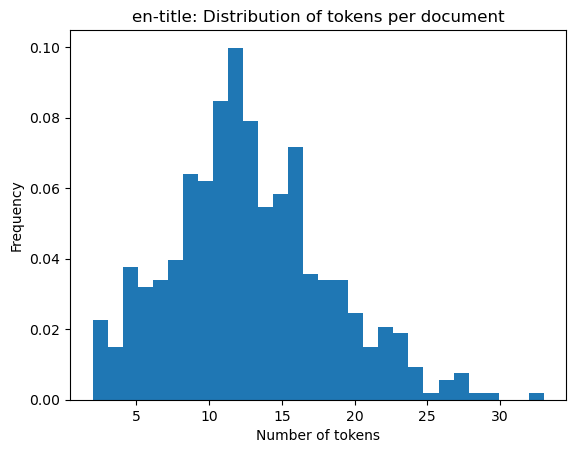

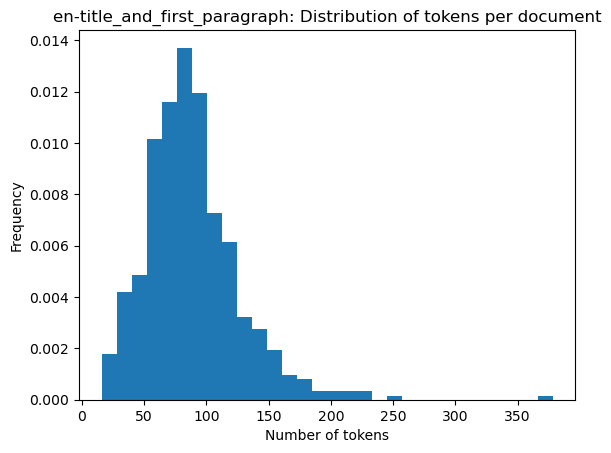

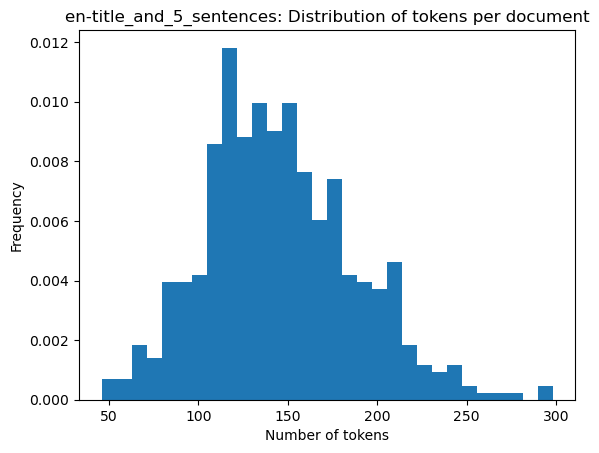

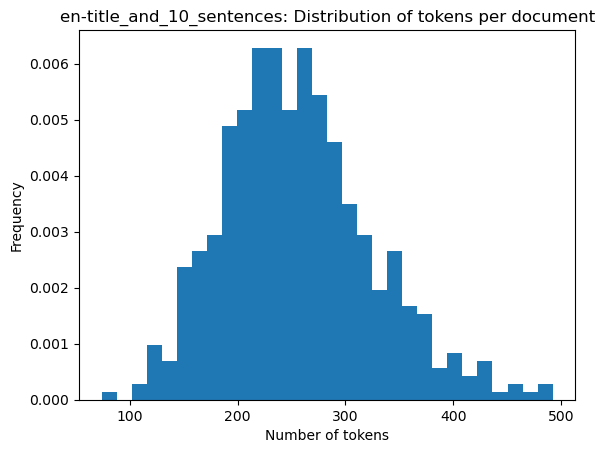

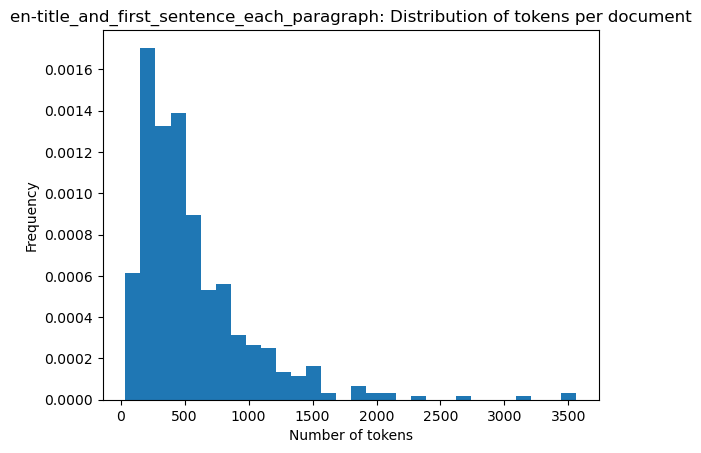

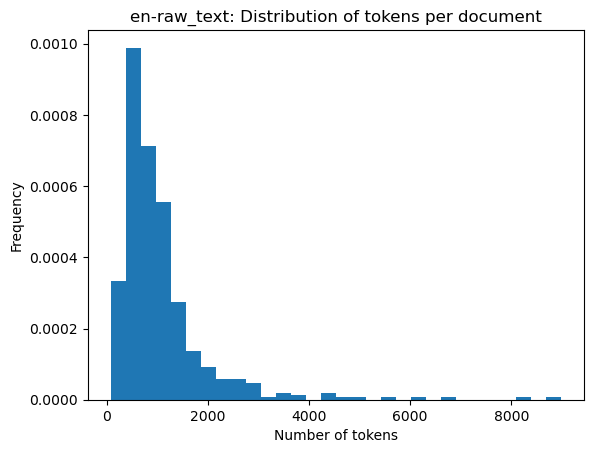

# it

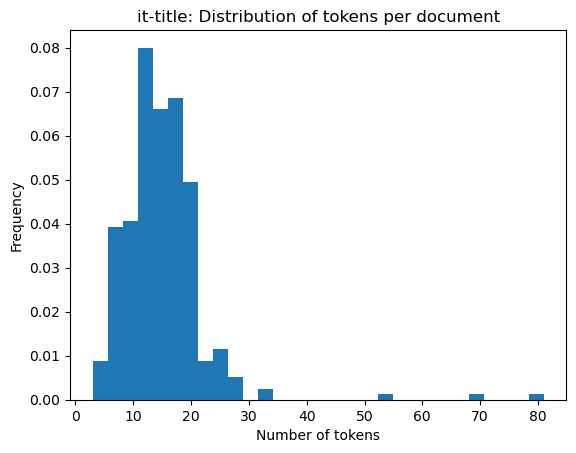

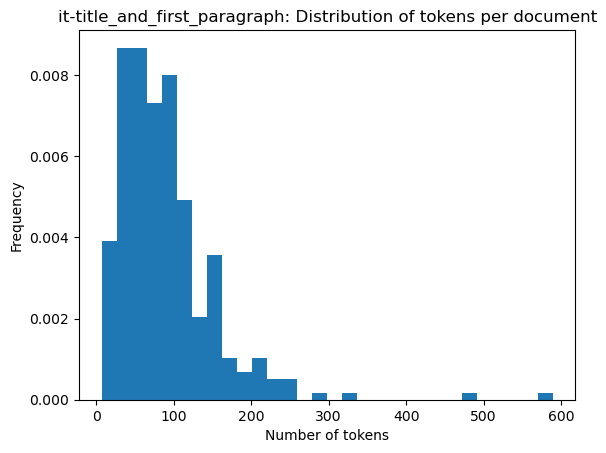

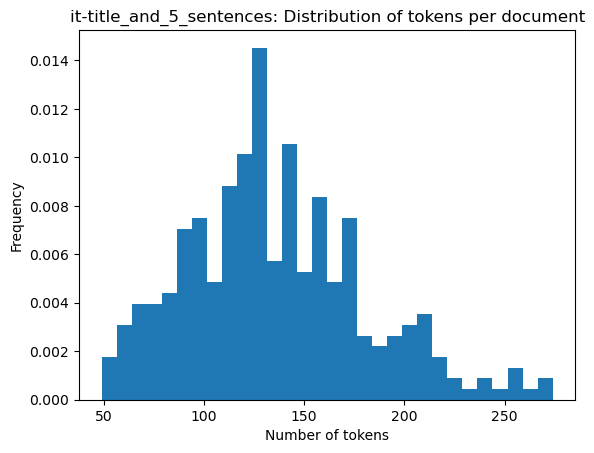

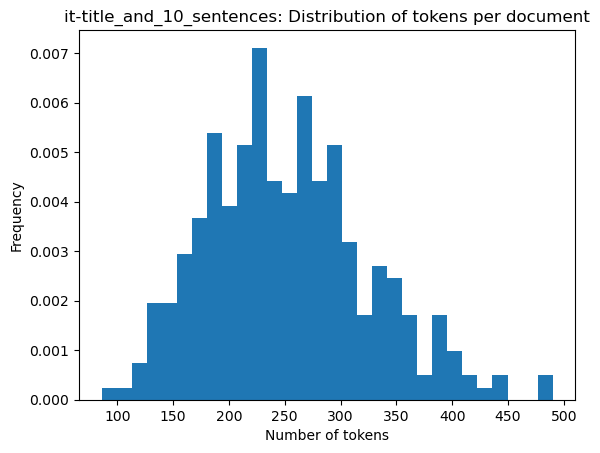

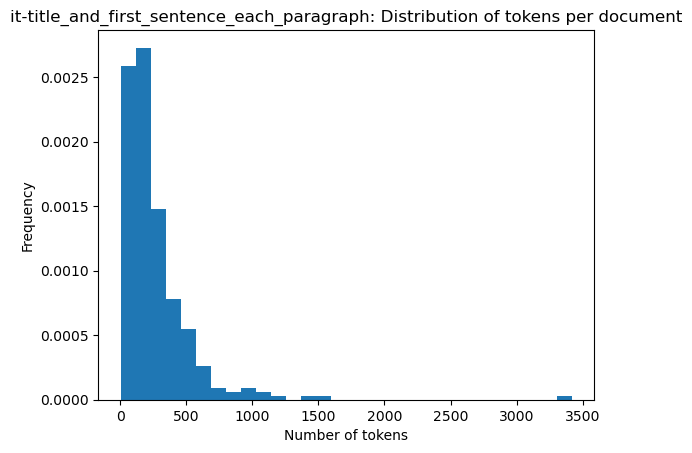

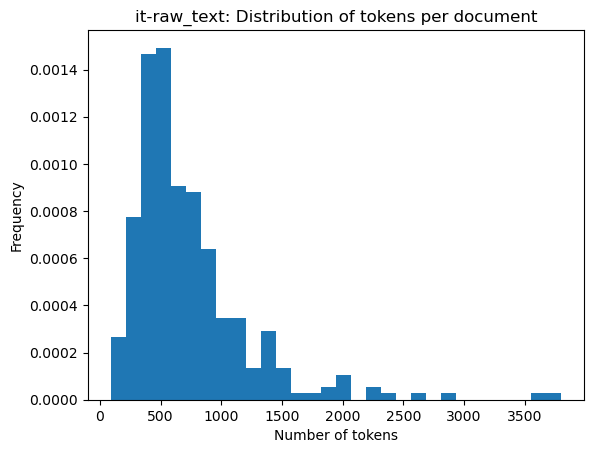

# fr

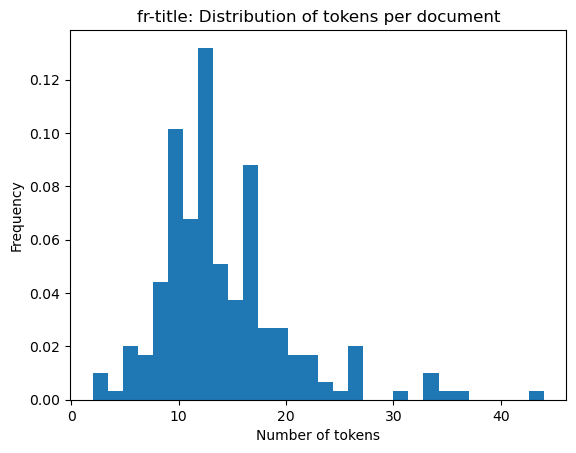

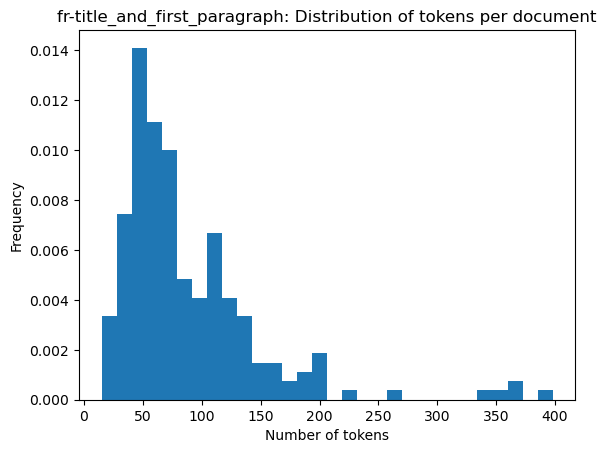

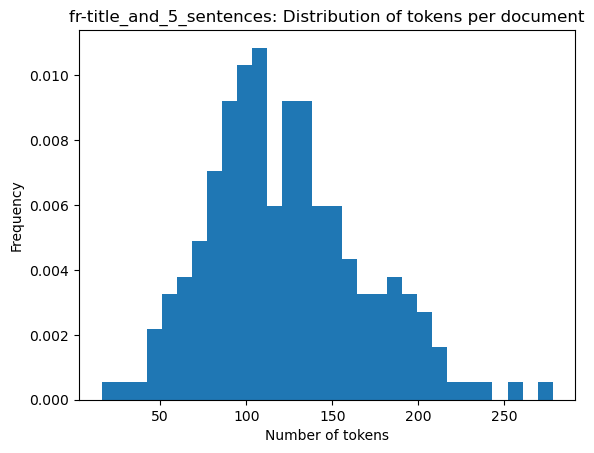

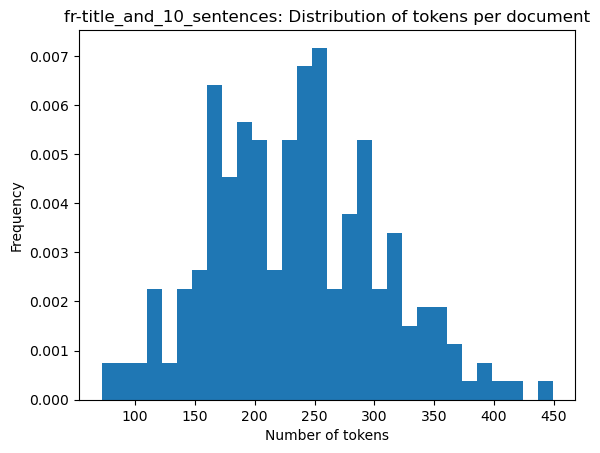

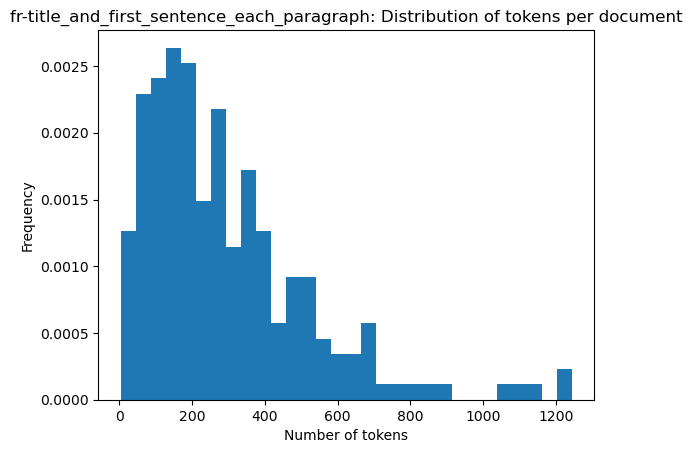

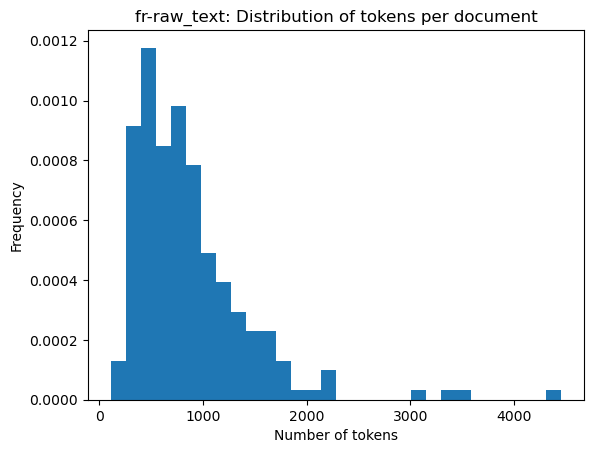

# po

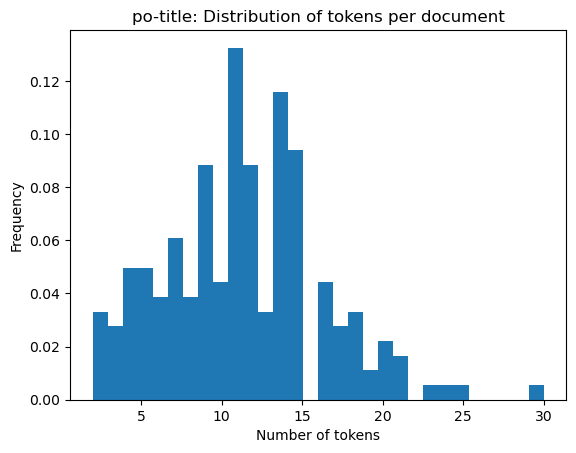

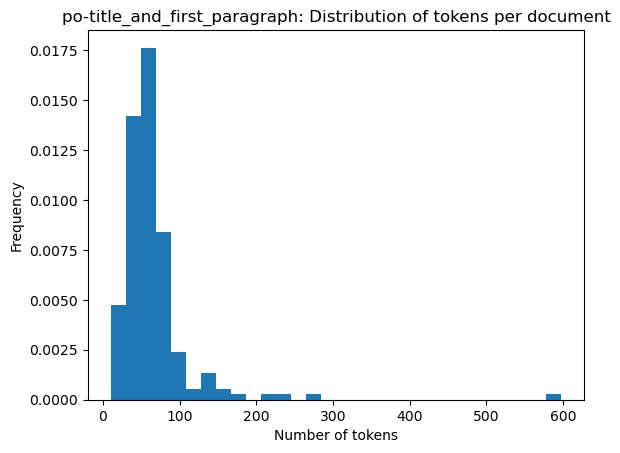

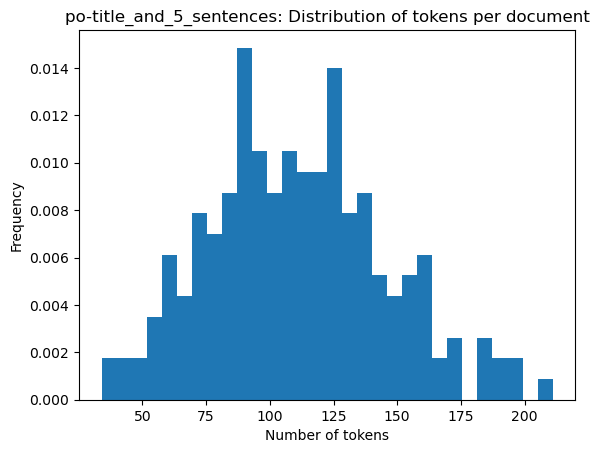

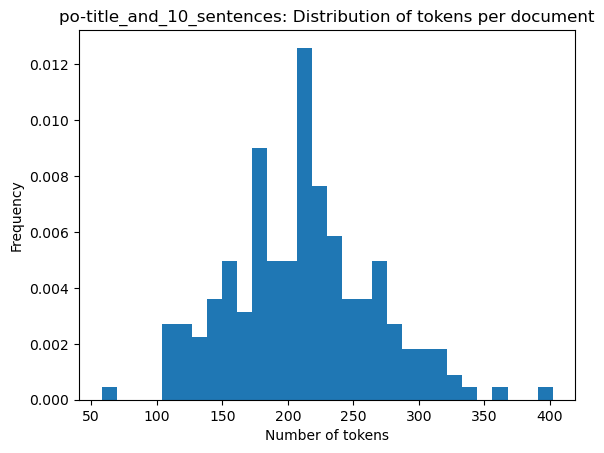

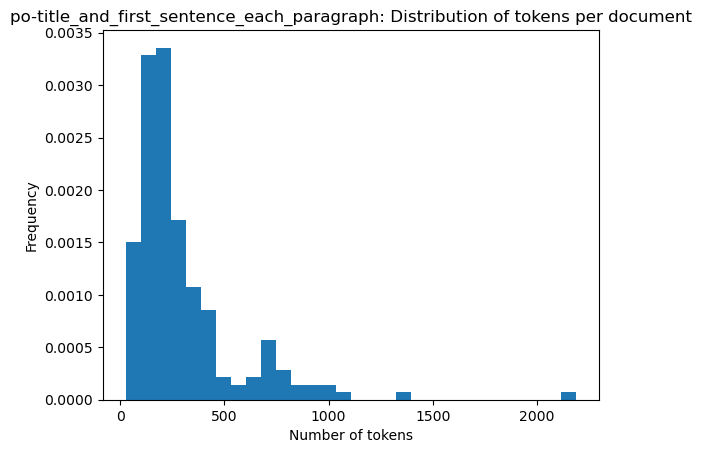

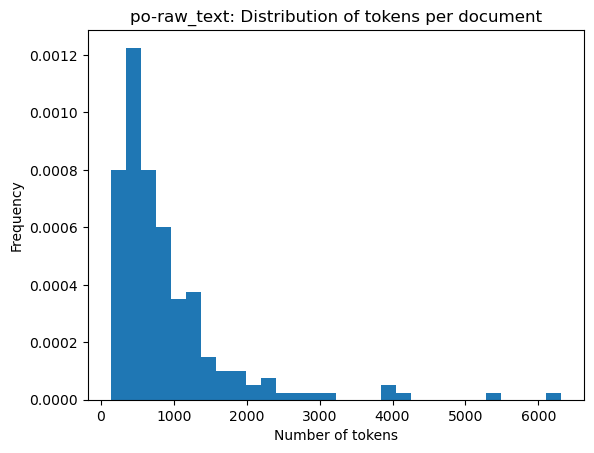

# ru

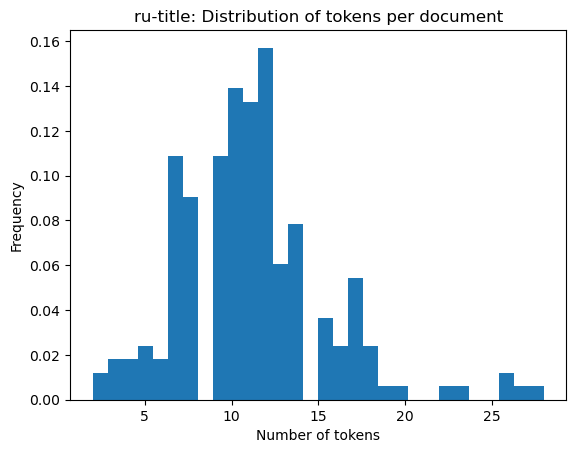

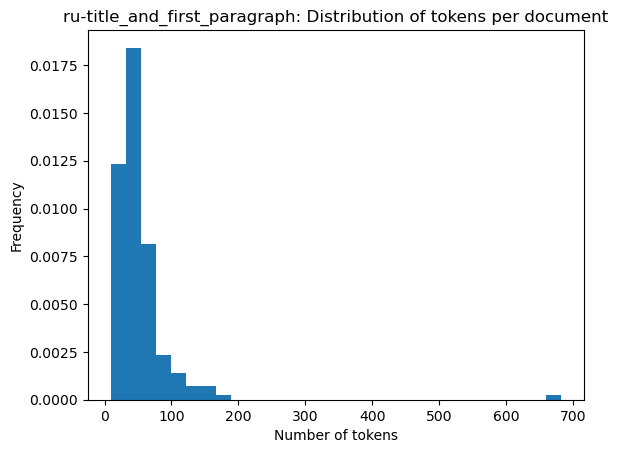

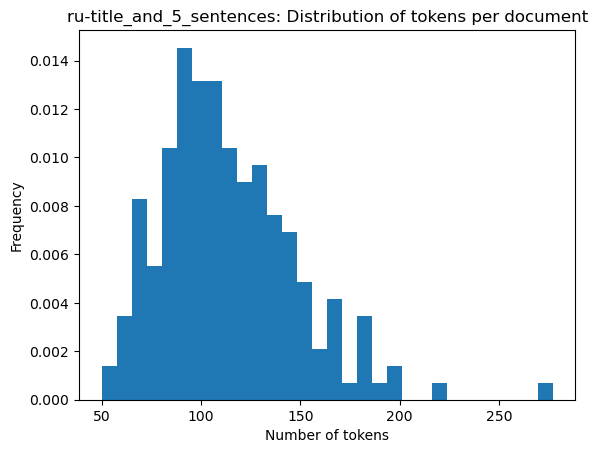

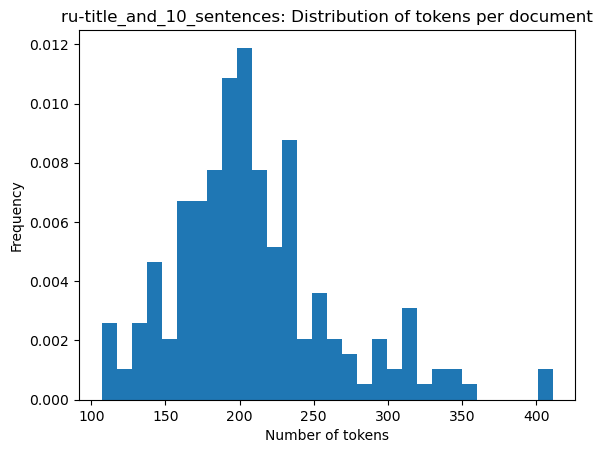

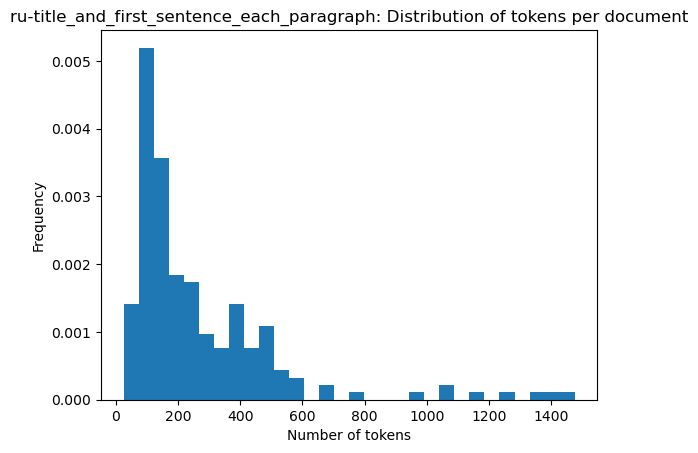

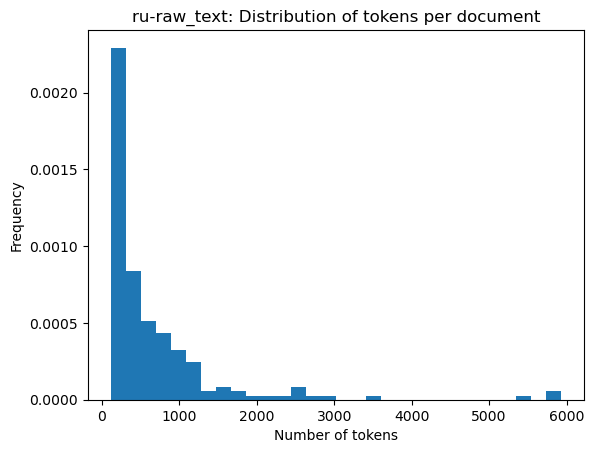

# ge

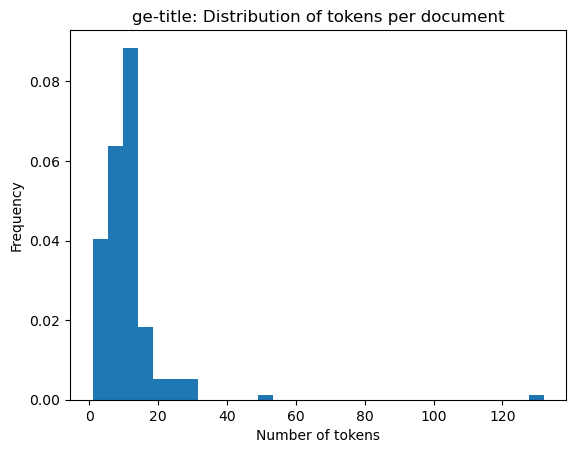

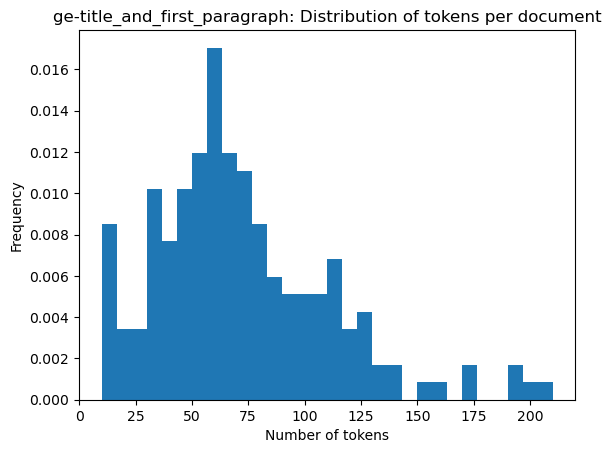

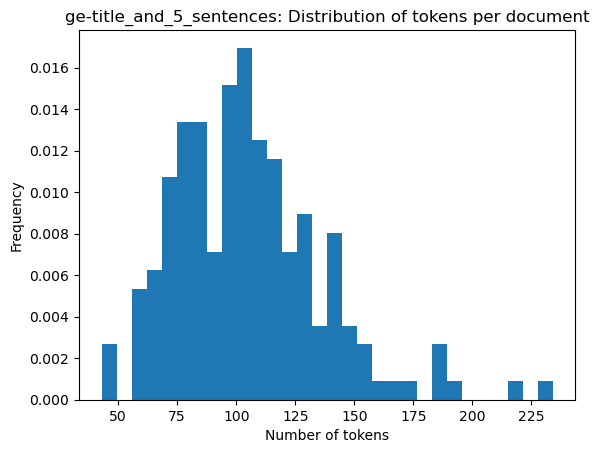

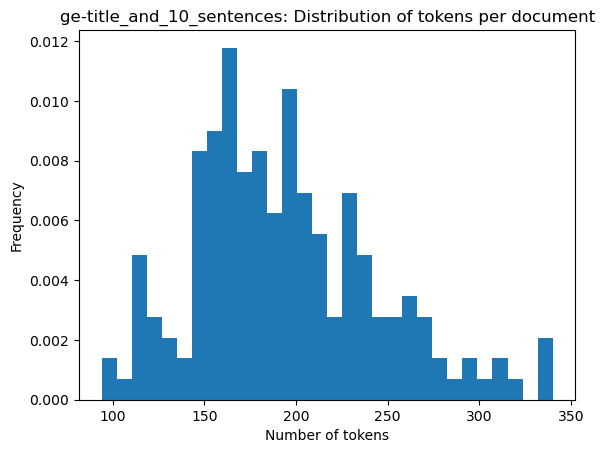

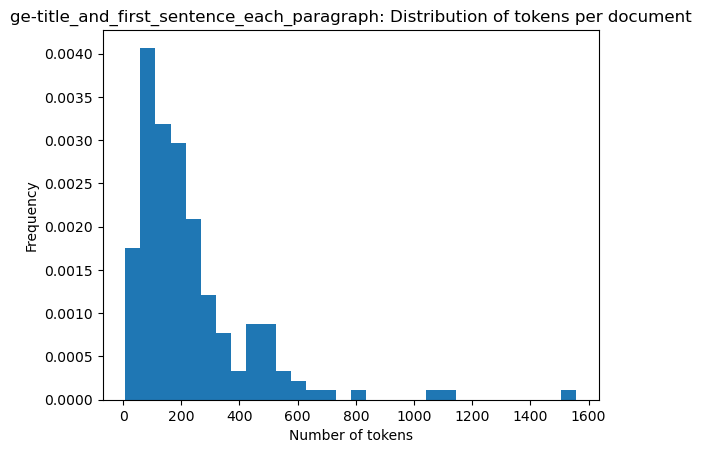

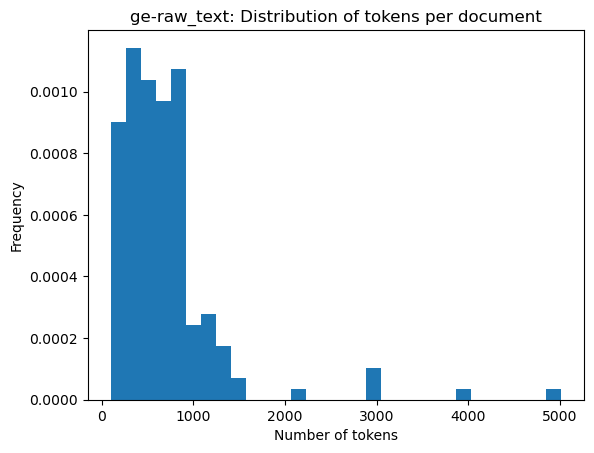

In [3]:
for language in LANGUAGES:
    display(Markdown(f'# {language}'))
    dataset = FramingArticleDataset(
        data_dir=DATA_DIR,
        language=language,
        subtask=2,
        train_split='train_and_dev',
        load_preprocessed_units_of_analysis=True,
        units_of_analysis_dir=os.path.join(DATA_DIR, 'preprocessed')
    )

    df = dataset.train_df

    nlp_ = spacy.load(SPACY_MODELS[language]['small'])

    for unit_of_analysis in UNITS_OF_ANALYSES:
        plot_histogram_num_tokens(
            doc_list=df[unit_of_analysis].tolist(),
            nlp=nlp_,
            title=f"{language}-{unit_of_analysis}: Distribution of tokens per document")
        plt.show()language


# Take aways

 * For 'title' and 'title and first sentence', 'title and 5 sentences' we do not need to split it into units of 512 tokens
 * For 'title and 10 sentences' it is okay for about 60%-70% of cases with just truncating
 * For 'title_and_first_sentence_each_paragraph' and 'raw_text', it is only okay for about 20%-30% of cases